Mean Squared Error 6.631774820213952e-05


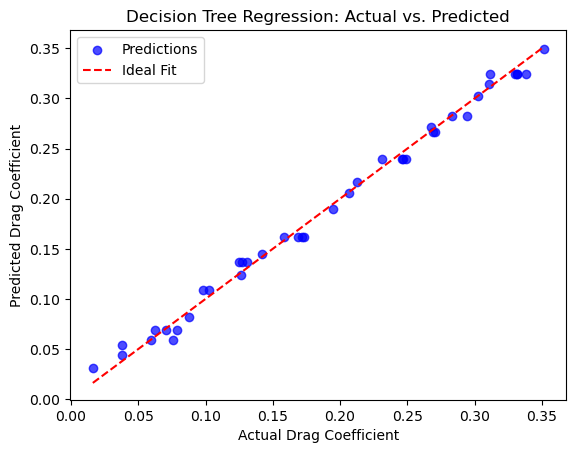

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Features: Angle of attack (0 to 15 degrees) and airspeed (200 to 300 m/s)

np.random.seed(42)
n_samples = 200 
angle = np.random.uniform(0, 15, n_samples)
airspeed = np.random.uniform(200, 300, n_samples)
X = np.column_stack((angle, airspeed))

#Target: Drag Coefficient ( a non-linear function with added noise)
noise = np.random.normal(0, 0.005, n_samples)
drag = 0.02 * angle + 0.0001 * airspeed + 0.05 * np.sin(np.radians(angle * 3)) + noise 
y = drag 

#Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create and train the Decision Tree Regressor 
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(X_train,y_train)

# Evaluate the model and visualize the results

y_pred = tree_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error", mse)

plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
plt.xlabel('Actual Drag Coefficient')
plt.ylabel('Predicted Drag Coefficient')
plt.title('Decision Tree Regression: Actual vs. Predicted')
plt.legend()
plt.show()



Mean Squared Error: 4.665089525509343e-05


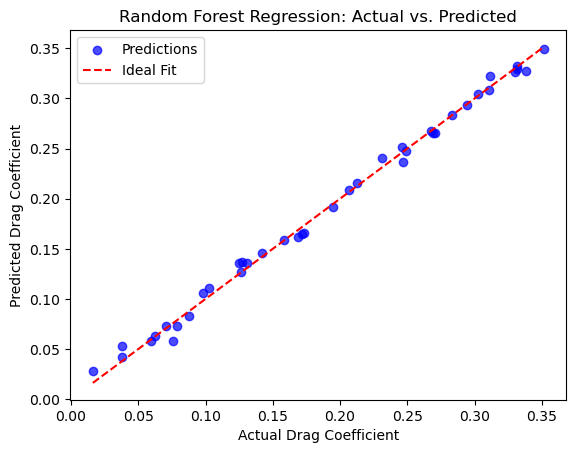

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features: angle of attack (0 to 15 degrees) and airspeed (200 to 300 m/s)
np.random.seed(42)
n_samples = 200
angle = np.random.uniform(0, 15, n_samples)
airspeed = np.random.uniform(200, 300, n_samples)
X = np.column_stack((angle, airspeed))

# Target: Drag coefficient (a non-linear function with added noise)
noise = np.random.normal(0, 0.005, n_samples)
drag = 0.02 * angle + 0.0001 * airspeed + 0.05 * np.sin(np.radians(angle * 3)) + noise
y = drag

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 3: Evaluate the model and visualize the results
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualization: Plot Actual vs. Predicted Drag Coefficient
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
plt.xlabel('Actual Drag Coefficient')
plt.ylabel('Predicted Drag Coefficient')
plt.title('Random Forest Regression: Actual vs. Predicted')
plt.legend()
plt.show()
